<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 3. <b>Корреляция и </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:center;">Вариант - 1 </div><div style="text-align:right;">Першин М.А. <span style="font-style: italic;font-weight: bold;">(max_pershin@bk.ru)</span></div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Домашняя работа</div>
    </div>
</div>

In [1]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
dfED = pnd.read_csv("grades.csv", sep=" ", skiprows=1, usecols=[1,4], names = ["math_SAT", "univ_GPA"])
dfED

OSError: File b'grades.csv' does not exist

In [ ]:
X - math_SAT (оценка за математическую часть теста SAT (тест для поступления в бакалавриат)
Y - univ_GPA (оценка в университете)

<p><b>Задача 1.</b> Корреляционная матрица</p>

<div>
<p>В соответствии с вариантом постройте корреляционную матрицу следующего вида:</p>
<table >
<tr>
<td width=60, bgcolor="grey"></td>
<td width=60, bgcolor="lightgrey">$$X$$</td>
<td width=60, bgcolor="lightgrey">$$Y$$</td>
<td width=60, bgcolor="lightgrey">$$X\cdot Y$$</td>
<td width=60, bgcolor="lightgrey">$$X/Y$$</td>
<td width=60, bgcolor="lightgrey">$$X-Y$$</td>
<tr>
<tr>
<td width=60, bgcolor="lightgrey">$$X$$</td>
<td width=60>$$r_{X,X}$$</td>
<td width=60>$$r_{X,Y}$$</td>
<td width=60>$$r_{X,X\cdot Y}$$</td>
<td width=60>$$r_{X,X/Y}$$</td>
<td width=60>$$r_{X,X-Y}$$</td>
<tr>
<tr>
<td width=60, bgcolor="lightgrey">$$Y$$</td>
<td width=60>$$r_{Y,X}$$</td>
<td width=60>$$r_{Y,Y}$$</td>
<td width=60>$$r_{Y,X\cdot Y}$$</td>
<td width=60>$$r_{Y,X/Y}$$</td>
<td width=60>$$r_{Y,X-Y}$$</td>
<tr>
<tr>
<td width=60, bgcolor="lightgrey">$$X\cdot Y$$</td>
<td width=60>$$r_{X\cdot Y,X}$$</td>
<td width=60>$$r_{X\cdot Y,Y}$$</td>
<td width=60>$$r_{X\cdot Y,X\cdot Y}$$</td>
<td width=60>$$r_{X\cdot Y,X/Y}$$</td>
<td width=60>$$r_{X\cdot Y,X-Y}$$</td>
<tr>
<tr>
<td width=60, bgcolor="lightgrey">$$X/Y$$</td>
<td width=60>$$r_{X/Y,X}$$</td>
<td width=60>$$r_{X/Y,Y}$$</td>
<td width=60>$$r_{X/Y,X\cdot Y}$$</td>
<td width=60>$$r_{X/Y,X/Y}$$</td>
<td width=60>$$r_{X/Y,X-Y}$$</td>
<tr>
<tr>
<td width=60, bgcolor="lightgrey">$$X-Y$$</td>
<td width=60>$$r_{X-Y,X}$$</td>
<td width=60>$$r_{X-Y,Y}$$</td>
<td width=60>$$r_{X-Y,X\cdot Y}$$</td>
<td width=60>$$r_{X-Y,X/Y}$$</td>
<td width=60>$$r_{X-Y,X-Y}$$</td>
<tr>
</table>
</div>

In [5]:
d = {"X": dfED.loc[1:104, "math_SAT"], 
     "Y": dfED.loc[1:104, "univ_GPA"],
     "X*Y": dfED.loc[1:104, "univ_GPA"]*dfED.loc[1:104, "math_SAT"],
     "X/Y": dfED.loc[1:104, "math_SAT"]/dfED.loc[1:104, "univ_GPA"],
     "X-Y": dfED.loc[1:104, "math_SAT"]-dfED.loc[1:104, "univ_GPA"],
    }
dfAll = pnd.DataFrame(d, columns = ["X", "Y", "X*Y", "X/Y", "X-Y"])
dfAll.corr(method="pearson")

,X,Y,X*Y,X/Y,X-Y
X,1.000000,0.662372,0.878291,-0.162453,0.999980
Y,0.662372,1.000000,0.938977,-0.840580,0.657675
X*Y,0.878291,0.938977,1.000000,-0.606796,0.875292
X/Y,-0.162453,-0.840580,-0.606796,1.000000,-0.156333
X-Y,0.999980,0.657675,0.875292,-0.156333,1.000000


<p><b>Задача 2.</b> Графики</p>

<p>Постройте графики в виде матрицы 2x2 для $(X,Y)$, $(X,X\cdot Y)$, $(X,X/Y)$ и $(X,X-Y)$. Добавьте в них прямые регрессии для каждого сочетания. Укажите каждого графика его название по сочетанию (X,Y и др.), а в легенде, какие данные он содержит.</p>

<p>Наклон и пересечение для прямых можно определить следующим образом:</p>

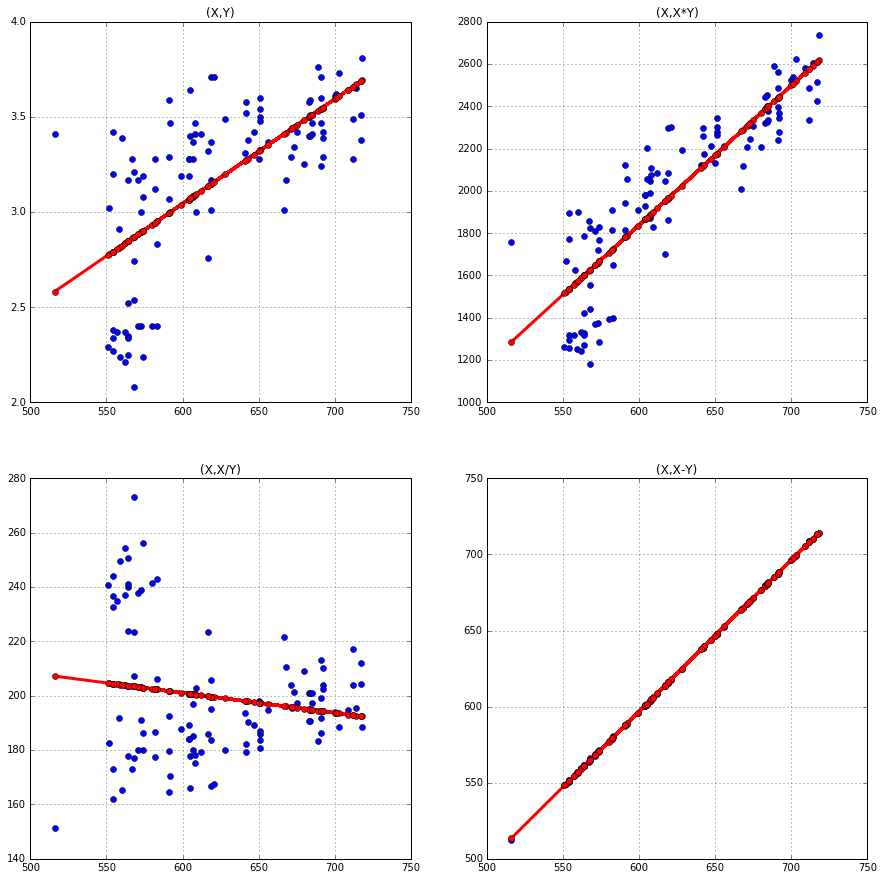

In [6]:
plt.figure(1, figsize=[15,15])

x = dfAll.X.values.astype(np.float32)
y = dfAll.Y.values.astype(np.float32)
x_train = np.array([x[:]]).T
y_train = np.array([y[:]]).T
linRegModel_y = LinearRegression()
lrModelTr_y = linRegModel_y.fit(x_train, y_train)
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_

plt.subplot(2,2,1)
plt.title("(X,Y)")
plt.plot(dfAll.X, dfAll.Y, "o")
plt.plot(x_train, f_x(x_train), "o-", color="red", lw=3)
plt.grid(True)

x = dfAll.X.values.astype(np.float32)
z = dfAll.Y.values.astype(np.float32)
y = x*z
x_train = np.array([x[:]]).T
y_train = np.array([y[:]]).T
linRegModel_y = LinearRegression()
lrModelTr_y = linRegModel_y.fit(x_train, y_train)
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_

plt.subplot(2,2,2)
plt.title("(X,X*Y)")
plt.plot(dfAll.X, dfAll.X*dfAll.Y, "o")
plt.plot(x_train, f_x(x_train), "o-", color="red", lw=3)
plt.grid(True)

x = dfAll.X.values.astype(np.float32)
z = dfAll.Y.values.astype(np.float32)
y = x/z
x_train = np.array([x[:]]).T
y_train = np.array([y[:]]).T
linRegModel_y = LinearRegression()
lrModelTr_y = linRegModel_y.fit(x_train, y_train)
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_

plt.subplot(2,2,3)
plt.title("(X,X/Y)")
plt.plot(dfAll.X, dfAll.X/dfAll.Y, "o")
plt.plot(x_train, f_x(x_train), "o-", color="red", lw=3)
plt.grid(True)

x = dfAll.X.values.astype(np.float32)
z = dfAll.Y.values.astype(np.float32)
y = x-z
x_train = np.array([x[:]]).T
y_train = np.array([y[:]]).T
linRegModel_y = LinearRegression()
lrModelTr_y = linRegModel_y.fit(x_train, y_train)
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_

plt.subplot(2,2,4)
plt.title("(X,X-Y)")
plt.plot(dfAll.X, dfAll.X-dfAll.Y, "o")
plt.plot(x_train, f_x(x_train), "o-", color="red", lw=3)
plt.grid(True)

plt.show()
